<a href="https://colab.research.google.com/github/Aioshu/Data-Structure-And-Algorithm/blob/main/Biagram_modelling_with_multi_character_multi_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/karpathy/makemore.git

Cloning into 'makemore'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 64 (delta 20), reused 16 (delta 16), pack-reused 41
Receiving objects: 100% (64/64), 123.29 KiB | 671.00 KiB/s, done.
Resolving deltas: 100% (36/36), done.


In [3]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
words=open('/content/makemore/names.txt','r').read().splitlines()

In [6]:
words[:1]

['emma']

In [7]:
# build vocabulary of characters

chars=sorted(list(set(''.join(words))))
stoi={s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos={i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [8]:
len(words)

32033

In [115]:
# build the dataset

block_size=3 # context lenght: HOw many characters do we take to predict the next words
X,Y=[],[]
for w in words:
  #print(w)
  context=[0]*block_size
  #print(context)
  for ch in w+'.':
    # print(ch)
    ix=stoi[ch]
    # print(ix)
    # print(context)
    X.append(context)
    Y.append(ix)
    #print("".join(itos[i] for i in context),'------->',itos[ix])
    context=context[1:]+[ix] # crop and append
    # print(context)

X=torch.tensor(X)
Y=torch.tensor(Y)

In [116]:
C=torch.randn(27,2)

In [103]:
# C

In [39]:
# F.one_hot(torch.tensor(5),num_classes=27).dtype

In [40]:
emb=C[X]
emb.shape

torch.Size([32, 3, 2])

In [31]:
# F.one_hot(torch.tensor(5),num_classes=27).float() @ C

In [41]:
W1=torch.randn(6,100)
b1= torch.randn(100)

In [63]:
h=emb.view(emb.shape[0],6) @ W1 +b1
h= torch.tanh(h)
h

tensor([[-0.5510, -0.9992,  0.7158,  ...,  0.9459,  0.9704,  0.9635],
        [-0.8229,  0.9998,  0.8637,  ..., -0.9729,  0.9884, -0.9840],
        [-1.0000,  0.9999, -0.5491,  ...,  0.0975,  0.5724, -0.8728],
        ...,
        [-0.9565,  0.9973, -0.9999,  ..., -0.8383,  0.8048, -0.9538],
        [-0.9982,  1.0000, -0.7693,  ..., -0.9929, -0.9766, -0.9981],
        [-0.9873, -0.7541,  1.0000,  ..., -0.9849,  0.8997, -0.9845]])

In [68]:
W2= torch.randn(100,27)
b2=torch.rand(27)

In [69]:
logits=h @ W2 +b2

In [70]:
logits.shape

torch.Size([32, 27])

In [71]:
counts=logits.exp()

In [82]:
prob=counts/counts.sum(1,keepdims=True)

In [83]:
prob.shape
# (emb.shape[0],6).shape

torch.Size([32, 27])

In [84]:
prob[0].sum()

tensor(1.0000)

In [79]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [90]:
loss=-prob[torch.arange(32),Y].log().mean()
loss

tensor(15.2905)

In [81]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [50]:
torch.cat([emb[:,0,:], emb[:,1,:], emb[:,2,:]],1).shape

torch.Size([32, 6])

In [52]:
torch.cat(torch.unbind(emb,1),1).shape

torch.Size([32, 6])

In [55]:
a=torch.arange(18)
a.shape

torch.Size([18])

In [56]:
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [58]:
a.view(2,3,3)

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]]])

In [ ]:
a.storage()

In [60]:
emb.shape

torch.Size([32, 3, 2])

In [61]:
emb.view(32,6)

tensor([[ 0.9482,  0.4810,  0.9482,  0.4810,  0.9482,  0.4810],
        [ 0.9482,  0.4810,  0.9482,  0.4810, -1.8260,  1.3776],
        [ 0.9482,  0.4810, -1.8260,  1.3776, -0.6554,  0.4417],
        [-1.8260,  1.3776, -0.6554,  0.4417, -0.6554,  0.4417],
        [-0.6554,  0.4417, -0.6554,  0.4417,  0.5662,  1.6609],
        [ 0.9482,  0.4810,  0.9482,  0.4810,  0.9482,  0.4810],
        [ 0.9482,  0.4810,  0.9482,  0.4810,  0.5496, -0.1373],
        [ 0.9482,  0.4810,  0.5496, -0.1373,  0.7793, -0.8842],
        [ 0.5496, -0.1373,  0.7793, -0.8842, -1.0744, -1.1760],
        [ 0.7793, -0.8842, -1.0744, -1.1760, -1.1402,  0.0546],
        [-1.0744, -1.1760, -1.1402,  0.0546, -1.0744, -1.1760],
        [-1.1402,  0.0546, -1.0744, -1.1760,  0.5662,  1.6609],
        [ 0.9482,  0.4810,  0.9482,  0.4810,  0.9482,  0.4810],
        [ 0.9482,  0.4810,  0.9482,  0.4810,  0.5662,  1.6609],
        [ 0.9482,  0.4810,  0.5662,  1.6609, -1.1402,  0.0546],
        [ 0.5662,  1.6609, -1.1402,  0.0

In [ ]:
#################### more clean ##########################################################

In [165]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        ...,
        [26, 26, 25],
        [26, 25, 26],
        [25, 26, 24]])

In [166]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [182]:
g=torch.Generator().manual_seed(2147483627)
C=torch.randn((27,2),generator=g)  # WHy we made this
W1=torch.randn((6,100),generator=g)
b1=torch.randn(100,generator=g)
W2=torch.randn((100,27),generator=g)
b2=torch.randn(27,generator=g)

parameters=[C, W1, b1 , W2, b2]

In [183]:
sum(p.nelement() for p in parameters)

3481

In [184]:
for p in parameters:
  p.requires_grad=True

In [189]:
lre=torch.linspace(-3,0,100000)
lrs=10**lre
lrs[1]

tensor(0.0010)

In [190]:
lre

tensor([-3.0000e+00, -3.0000e+00, -2.9999e+00,  ..., -6.0001e-05,
        -3.0000e-05,  0.0000e+00])

In [191]:
lri=[]
lossi=[]
for i in range(100000):
  # mini batch construct
  ix=torch.randint(0,X.shape[0],(32,))

  # forward pass
  emb=C[X[ix]] # (32,3,2)

  h=torch.tanh(emb.view(-1,6) @ W1 +b1) # (32, 100)
  logits=h @ W2 +b2# (32,27)
  loss=F.cross_entropy(logits,Y[ix])
  #print(loss.item())

  # backword pass
  for p in parameters:
    p.grad=None
  loss.backward()

  # update
  lr=lrs[i]
  lri.append(lr)
  lossi.append(loss.item())
  for p in parameters:
    p.data+= -lr*p.grad

print(loss.item())

2.6573565006256104


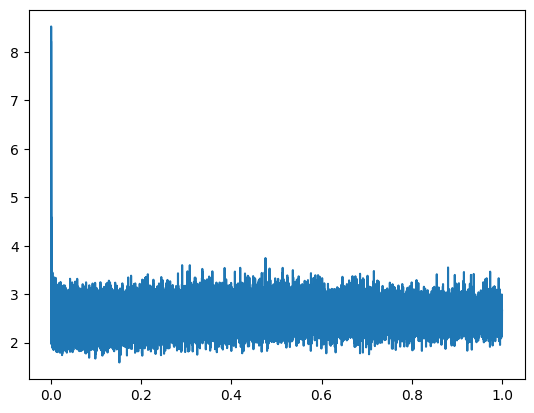

In [192]:
plt.plot(lri,lossi)

In [193]:
# forward pass
emb=C[X] # (32,3,2)

h=torch.tanh(emb.view(-1,6) @ W1 +b1) # (32, 100)
logits=h @ W2 +b2# (32,27)
loss=F.cross_entropy(logits,Y)
print(loss.item())

2.511772632598877


In [128]:
logits.max(1)

torch.return_types.max(
values=tensor([4.6055, 3.4909, 4.1208, 3.3168, 3.9747, 2.9787, 4.4833, 2.9182, 3.3838,
        2.9062, 4.8930, 3.0737, 3.4152, 3.9747, 5.3431, 3.0742, 4.3264, 3.2350,
        3.9747, 3.8137, 5.5323, 4.7354, 3.4737, 4.8483, 4.8553, 3.7628, 3.0742,
        3.3827, 5.4682, 5.2396, 4.6388, 3.7076], grad_fn=<MaxBackward0>),
indices=tensor([ 0,  1,  1, 13, 13,  1, 14,  1, 14,  1,  0,  1,  1, 13, 13,  1,  0,  9,
        13,  8, 19,  0,  1, 14,  0,  1,  1,  1,  4,  0,  0,  1]))

In [114]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [124]:
torch.randint(0,X.shape[0],(32,))

tensor([ 83342, 119767,  47631, 155941, 159413,   6103,  44580, 192043, 167108,
        215125, 164667,  36134, 188847,  52984, 209185,  14696,  64366, 178751,
        184079, 199097, 192343, 224795, 130313, 125611,  99493, 184129, 201267,
          1483,  74903, 155613, 104637, 209638])